# Validation of the tsorb module
Author: Leander Kotzur

Date: 21.03.2018

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import tsib
import tsib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import os

Get weather data

In [25]:
try_data,location = tsib.readTRY()

In [26]:
try_data.head()

,RG,IS,MM,DD,HH,N,WR,WS,T,p,...,RF,W,B,DHI,IK,A,E,IL,GHI,DNI
2010-01-01 00:30:00+01:00,4,1,1,1,1,7,230,5.7,-2.6,1005.3,...,93,70,0,0,1,251,-285,9,0,0.0
2010-01-01 01:30:00+01:00,4,1,1,1,2,7,240,5.7,-3.9,1011.4,...,89,70,0,0,1,275,-291,9,0,0.0
2010-01-01 02:30:00+01:00,4,1,1,1,3,8,260,5.7,-4.6,1016.0,...,90,22,0,0,1,281,-296,9,0,0.0
2010-01-01 03:30:00+01:00,4,1,1,1,4,8,270,5.7,-3.9,1016.2,...,95,22,0,0,1,281,-297,9,0,0.0
2010-01-01 04:30:00+01:00,4,1,1,1,5,8,280,5.5,-3.3,1016.5,...,97,10,0,0,1,283,-299,9,0,0.0


Distribution house hold size [Source](https://www.destatis.de/DE/PresseService/Presse/Pressemitteilungen/2017/02/PD17_067_122.html;jsessionid=BE7ADC99A9C367432700C0E566C0D35B.cae3)

In [30]:
def getSimDist(sim_num):
    hhSize = pd.Series([16875.0,13956.0,4940.0,3679.0,1323.0], index = [1,2,3,4,5])
    hhSize_sim_num = hhSize * sim_num/hhSize.sum()
    hhSize_sim_num = hhSize_sim_num.astype(int)
    return hhSize_sim_num

## Get single profiles

In [31]:
profileList = []

In [8]:
hhSize_sim_num = getSimDist(100)
for hh_size in hhSize_sim_num.index:
    profileList.append(tsib.simHouseholdsParallel(hh_size,2010, hhSize_sim_num.ix[hh_size], 
                                               singleProfiles = True,
                                        weather_data = try_data, 
                                        resolved_load = False, freq = '15min'))

Start 7 processes, round 1 of 6
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 7 processes, round 2 of 6
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 7 processes, round 3 of 6
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 7 processes, round 4 of 6
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 7 processes, round 5 of 6
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 6 processes, round 6 of 6
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
- closed the round
Start 7 processes, round 1 of 5
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 7 processes, round 2 of 5
  Process 1
  Process 2
  Process 3

In [9]:
profiles = pd.DataFrame(index =profileList[0][0].index)
for i,hh_size in enumerate(hhSize_sim_num.index):
    for ii in range(hhSize_sim_num.ix[hh_size]):
        profiles['Profile_HH' + str(hh_size) + '_NO'+str(ii)] = profileList[i][ii]['Load']

In [10]:
profiles.to_csv(os.path.join('data','SingeHouseHolds.csv'))

## Validation Germany

Calculate the number of simulations for different household sizes.

In [11]:
hhSize_sim_num = getSimDist(1000)

Init full load

In [12]:
full_load = None

Start 7 processes, round 1 of 60
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 7 processes, round 2 of 60
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 7 processes, round 3 of 60
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 7 processes, round 4 of 60
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 7 processes, round 5 of 60
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 7 processes, round 6 of 60
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 7 processes, round 7 of 60
  Process 1
  Process 2
  Process 3
  Process 4
  Process 5
  Process 6
  Process 7
- closed the round
Start 7 processes, round 8 of 60
  Process 1
  P

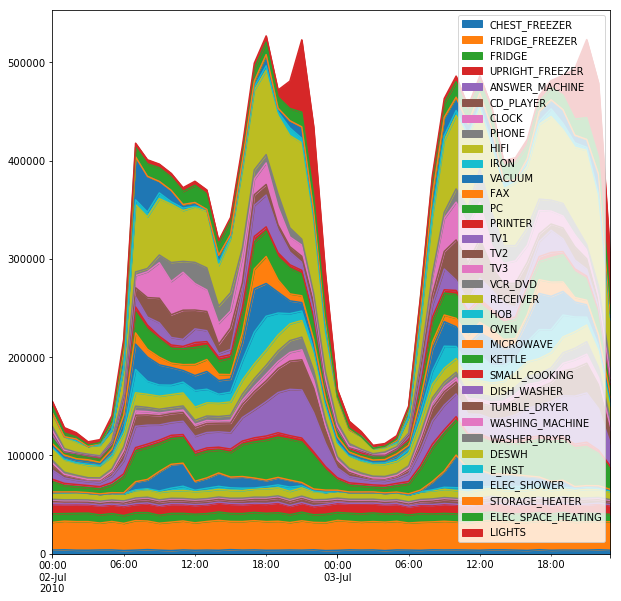

In [13]:
for hh_size in hhSize_sim_num.index:
    if full_load is None:
        full_load = tsib.simHouseholdsParallel(hh_size,2010, hhSize_sim_num.ix[hh_size], 
                                            weather_data = try_data, 
                                            resolved_load = True, freq = '15min')
    else:
        full_load += tsib.simHouseholdsParallel(hh_size,2010, hhSize_sim_num.ix[hh_size], 
                                            weather_data = try_data, 
                                            resolved_load = True, freq = '15min')
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
full_load['20100702':'20100703'].resample('1h').mean().plot(kind='area', ax = ax)

#### Grouped Load

In [16]:
app_input = pd.read_csv(os.path.join('..','..','..','01_FullStateEco','tsib',
                                     'tsib','edemand','Data','Import','appliances.csv'),
                        decimal = ',', skiprows=0,sep=';',index_col = 0)

Add light input

In [17]:
app_input = app_input.append(pd.DataFrame(['Lighting'],columns = ['type'],index = ['LIGHTS']))

In [18]:
grouped_load = pd.DataFrame(0,index = full_load.index, columns = np.unique(app_input['type']))

In [19]:
load_groups = np.unique(app_input['type'])+'LI'

In [20]:
for load in full_load.columns:
    group = app_input.loc[load,'type']
    grouped_load[group] += full_load[load]

Plot Reults

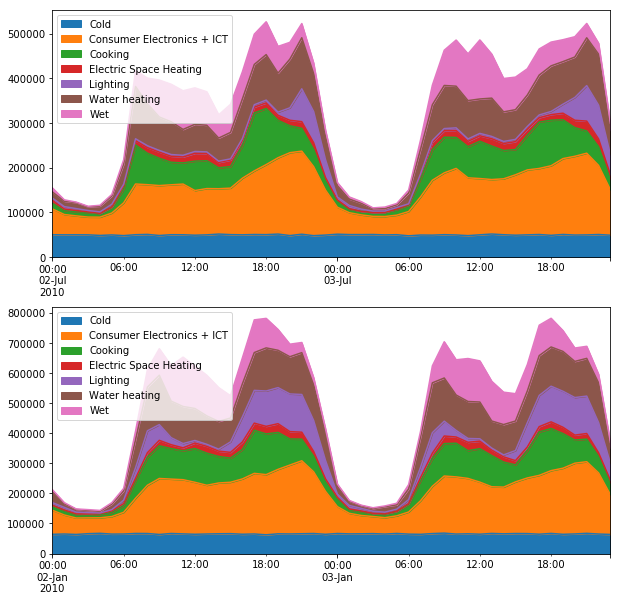

In [21]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(211)
grouped_load['20100702':'20100703'].resample('1h').mean().plot(kind='area', ax = ax)
ax = plt.subplot(212)
grouped_load['20100102':'20100103'].resample('1h').mean().plot(kind='area', ax = ax)

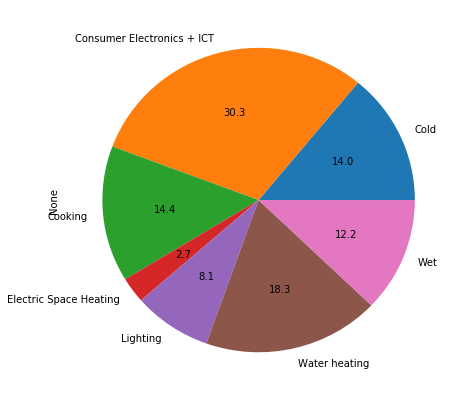

In [22]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111)
grouped_load.sum().plot(kind = 'pie',autopct='%.1f',)

In [24]:
grouped_load.to_csv(os.path.join('data','Houshold_load_GER.csv'))